# Data Visualization
This notebooks contains all the necessary steps to preprocess the data and plot it in different formats

In [1]:
#General
import re
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

#Normalization
from sklearn.preprocessing import StandardScaler

#Outlier removal
import scipy
from scipy import stats
from scipy.stats import zscore

#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#pd.set_option('display.max_rows', 800)
#pd.set_option('display.max_columns', 800)

In [3]:
#Creating a dataframe from txt file

df = pd.read_csv('../data/matrix_standard_mkf52b.txt', delimiter = "\t", header = 0)
pd.set_option('display.max_rows', 20)
df

,Class,Lipid,Occurence,m/z,RTmin,RTmax,01PCCL3Ctrl,02PCCL3Ctrl,03PCCL3Ctrl,04PCCL3TSH0,05PCCL3TSH0,06PCCL3TSH0,07PCCL3TSH24h,08PCCL3TSH24h,09PCCL3TSH24h,10PCCL3TSH48h,11PCCL3TSH48h,12PCCL3TSH48h,13Blank,14BlankStdrmix
0,GL02_DAG,2010063_36:4,NH4 1,634.54047,0.72,0.72,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.334732e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
1,GL02_DAG,2010108_38:4,NH4 1,662.57178,0.72,0.72,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.242980e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
2,GL02_DAG,2010119_38:5,NH4 1,660.55615,0.72,0.72,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.837245e+05,4.603558e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
3,GL02_DAG,2010151_40:3,NH4 1,692.61877,0.72,0.72,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.882858e+05,0.000000e+00,4.610804e+05,0.000000e+00,0.000000,0.000000e+00
4,GL02_DAG,2010175_40:5,NH4 1,688.58746,0.71,0.72,4.068159e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,SP05_GlcCer,501AA52_30:2,NH4 1,659.52051,1.59,1.71,0.000000e+00,0.000000e+00,0.000000e+00,4.924877e+05,0.000000e+00,6.145548e+05,0.000000e+00,4.329259e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,203132.250488,2.011282e+05
1492,SP05_GlcCer,IS501AA08_42:2,H 1,810.68176,1.28,1.30,5.746747e+06,2.362923e+06,4.421140e+06,1.104483e+06,1.158592e+06,0.000000e+00,3.671420e+06,3.038550e+06,7.532020e+06,7.040428e+06,8.635106e+06,8.894750e+06,0.000000,0.000000e+00
1493,SP05_GlcCer,IS501AC01_34:1,H 1,700.57220,1.39,1.41,1.562770e+07,7.840157e+06,1.278245e+07,3.986229e+06,3.938040e+06,3.370967e+06,1.188790e+07,9.416717e+06,2.769256e+07,1.933890e+07,2.955982e+07,2.770973e+07,0.000000,0.000000e+00
1494,SP05_GlcCer,IS7303902505_36:2,H 1,726.58783,1.34,1.36,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.771544e+05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00


In [4]:
#Selection of important characters on columns Class and Lipid

Class2 = []
for row in df['Class']:
    row = row.split('_')
    if row[1] == 'PxCer':
        Class2.append('SM')
    else:
        Class2.append(row[1])
    
df.insert(0, 'Class2', Class2)

Lipid2 = []
for row in df['Lipid']:
    row = row.split('_')
    if row[0] == '1deoxyCer':
        Lipid2.append(f'1deoxyCer({row[1]})')
    elif row[0].startswith('EX'):
        Lipid2.append(f'EX({row[1]})')
    else:
        Lipid2.append(f'({row[1]})')
    
df.insert(2, 'Lipid2', Lipid2)

<AxesSubplot:>

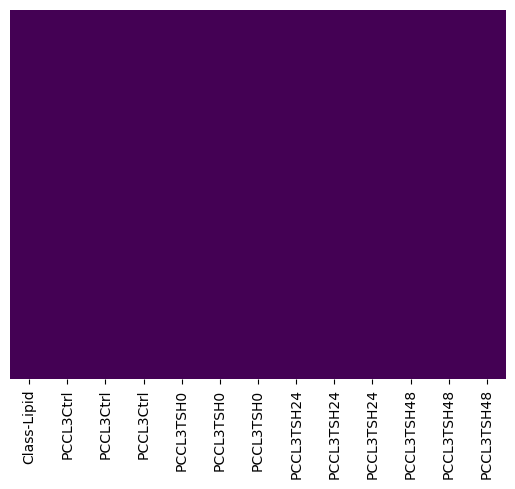

In [5]:
#Elimination of unnecesary columns
df['Class-Lipid'] = df['Class2'] + df['Lipid2']
first_col = df.pop('Class-Lipid')
df.insert(0, 'Class-Lipid', first_col)
df = df.drop(['13Blank','14BlankStdrmix','Occurence','m/z','RTmin','RTmax', 'Class', 'Lipid', 'Class2', 'Lipid2'], axis = 1)
#Rename Columns
df = df.rename(columns = {'01PCCL3Ctrl': 'PCCL3Ctrl', '02PCCL3Ctrl': 'PCCL3Ctrl', '03PCCL3Ctrl': 'PCCL3Ctrl',
                          '04PCCL3TSH0': 'PCCL3TSH0', '05PCCL3TSH0': 'PCCL3TSH0', '06PCCL3TSH0': 'PCCL3TSH0',
                          '07PCCL3TSH24h': 'PCCL3TSH24', '08PCCL3TSH24h': 'PCCL3TSH24', '09PCCL3TSH24h': 'PCCL3TSH24',
                          '10PCCL3TSH48h': 'PCCL3TSH48', '11PCCL3TSH48h': 'PCCL3TSH48', '12PCCL3TSH48h': 'PCCL3TSH48'}
               , inplace = False)

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

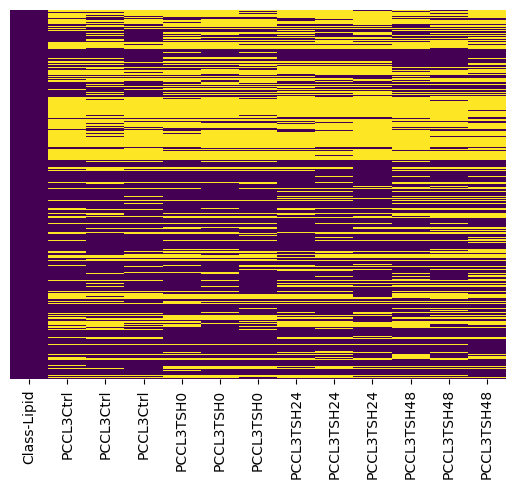

In [6]:
#transform 0 to nans
df.replace(0, np.nan, inplace=True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

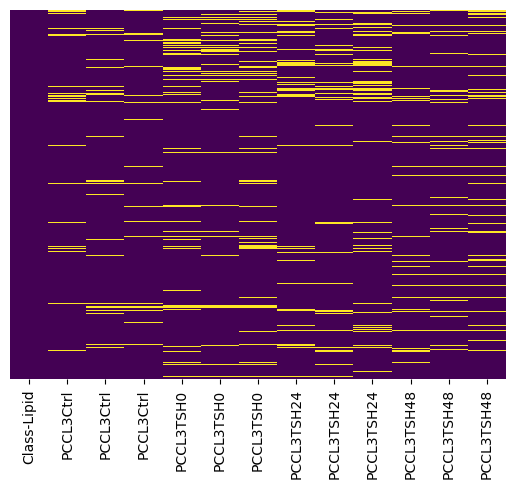

In [7]:
# dropping the NaNs, treshols 7 means that those rows with at least 7 non-NaN values are kept
df = df.dropna(axis=0, how='any', thresh=8, inplace=False)
df = df.reset_index(drop = True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [8]:
#transpose of the dataframe
df_t = df.T
df_t = df_t.reset_index(drop = False)
#df_t.iloc[2:,1:] = df_t.iloc[2:,1:].apply(pd.to_numeric, errors='coerce')
df_t

,index,0,1,2,3,4,5,6,7,8,...,791,792,793,794,795,796,797,798,799,800
0,Class-Lipid,DAG(38:3),DAG(47:1),DAG(47:2),DAG(48:2),DAG(50:2),DAG(51:13),DAG(51:2),DAG(56:14),DAG(57:2),...,GlcCer(36:1),GlcCer(38:1),GlcCer(40:1),GlcCer(42:1),GlcCer(41:1),GlcCer(38:2),GlcCer(40:2),GlcCer(42:2),GlcCer(34:1),GlcCer(26:1)
1,PCCL3Ctrl,347808.876953,NaN,NaN,NaN,NaN,35292799.375,444396.969727,10796030.03125,NaN,...,5507642.015625,48301122.25,92347098.25,64233485.375,1086364.019531,NaN,2788144.0,5746746.8125,15627699.375,61137388.875
2,PCCL3Ctrl,NaN,355669.166016,439409.953125,668088.202148,318516.367188,23882272.25,557540.097656,6554265.4375,366013.011719,...,3277131.728516,28845570.1875,55660605.625,34194577.625,661059.289062,739438.289062,1591769.882812,2362922.875,7840157.296875,61511216.75
3,PCCL3Ctrl,418058.460938,289114.063477,NaN,602003.376953,376208.460938,34338002.75,490810.828125,10354081.0625,299891.638672,...,5064398.203125,43816673.75,85040737.0,58417309.375,1276795.164062,829807.5,2338721.84375,4421139.9375,12782447.4375,41523142.0
4,PCCL3TSH0,NaN,430466.422852,536775.84375,627430.935547,393159.423828,29808032.25,695928.527344,9132316.46875,514349.547852,...,590103.54248,12350108.375,23609513.6875,11908924.8125,NaN,NaN,864341.765625,1104483.34375,3986228.785156,76782690.625
5,PCCL3TSH0,307168.945312,301597.802734,470965.398438,519806.798828,431677.078125,29200497.125,551659.547852,9026854.0,412266.180664,...,608281.185547,12428324.1875,22353418.5625,11975144.21875,NaN,NaN,690506.125,1158591.8125,3938040.210938,75738361.125
6,PCCL3TSH0,457417.742188,NaN,422092.225586,720404.753906,NaN,31057749.25,515137.155273,9312264.71875,435157.457031,...,662126.523926,11985305.90625,22525780.1875,12085476.21875,NaN,NaN,472379.875,NaN,3370967.257812,69639969.25
7,PCCL3TSH24,NaN,NaN,NaN,NaN,NaN,23136390.75,402047.734375,7570751.5,426885.326172,...,2884102.277344,30165210.5,61102512.625,39482891.5,NaN,687378.390625,1868235.84375,3671419.921875,11887902.375,60250942.875
8,PCCL3TSH24,361030.351562,323475.652344,479164.703125,650258.289062,441276.530273,24340786.375,NaN,7514219.5625,487764.206055,...,2453452.457031,25308778.6875,50476723.25,32783259.25,NaN,691460.820312,1556927.328125,3038550.46875,9416717.390625,50056159.4375
9,PCCL3TSH24,NaN,421719.30957,586638.287109,NaN,428148.052734,30618193.0,NaN,9453057.78125,NaN,...,7531925.09375,74596679.75,146570423.5,95465608.75,690102.367188,1511950.96875,4593953.5625,7532020.125,27692560.6875,93581014.25


/var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/ipykernel_19454/1131074213.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_t = df_t.groupby(['index']).apply(lambda x: x.fillna(x.mean()))
/var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/ipykernel_19454/1131074213.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_t = df_t.groupby(['index']).apply(lambda x: x.fillna(x.mean()))
/var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/ipykernel_19454/1131074213.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns befo

<AxesSubplot:>

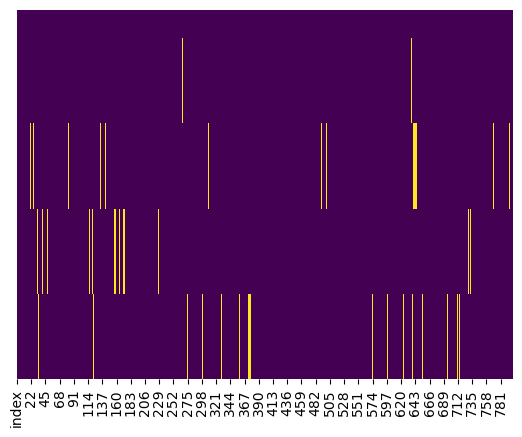

In [9]:
#group by condition and fill nan with the mean of the condition
df_t = df_t.groupby(['index']).apply(lambda x: x.fillna(x.mean()))
df_t = df_t.reset_index(drop = True)
sns.heatmap(df_t.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

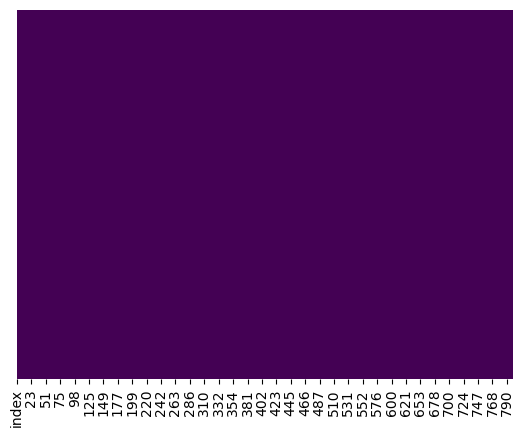

In [10]:
#droppping the rest of the Nans
df_t = df_t.dropna(axis=1, inplace=False)
sns.heatmap(df_t.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [11]:
df_t = df_t.rename(columns=df_t.iloc[0])
df_t = df_t.iloc[1: , :]
df_t

,Class-Lipid,DAG(38:3),DAG(47:1),DAG(47:2),DAG(48:2),DAG(50:2),DAG(51:13),DAG(51:2),DAG(56:14),DAG(57:2),...,SM(44:4),GlcCer(34:1),GlcCer(36:1),GlcCer(38:1),GlcCer(40:1),GlcCer(42:1),GlcCer(40:2),GlcCer(42:2),GlcCer(34:1),GlcCer(26:1)
1,PCCL3Ctrl,347808.876953,322391.614746,439409.953125,635045.789551,347362.414062,35292799.375,444396.969727,10796030.03125,332952.325195,...,2160632.4375,15627699.375,5507642.015625,48301122.25,92347098.25,64233485.375,2788144.0,5746746.8125,15627699.375,61137388.875
2,PCCL3Ctrl,382933.668945,355669.166016,439409.953125,668088.202148,318516.367188,23882272.25,557540.097656,6554265.4375,366013.011719,...,1534976.125,7840157.296875,3277131.728516,28845570.1875,55660605.625,34194577.625,1591769.882812,2362922.875,7840157.296875,61511216.75
3,PCCL3Ctrl,418058.460938,289114.063477,439409.953125,602003.376953,376208.460938,34338002.75,490810.828125,10354081.0625,299891.638672,...,1763181.984375,12782447.4375,5064398.203125,43816673.75,85040737.0,58417309.375,2338721.84375,4421139.9375,12782447.4375,41523142.0
4,PCCL3TSH0,382293.34375,430466.422852,536775.84375,627430.935547,393159.423828,29808032.25,695928.527344,9132316.46875,514349.547852,...,1781617.390625,3986228.785156,590103.54248,12350108.375,23609513.6875,11908924.8125,864341.765625,1104483.34375,3986228.785156,76782690.625
5,PCCL3TSH0,307168.945312,301597.802734,470965.398438,519806.798828,431677.078125,29200497.125,551659.547852,9026854.0,412266.180664,...,1907011.806641,3938040.210938,608281.185547,12428324.1875,22353418.5625,11975144.21875,690506.125,1158591.8125,3938040.210938,75738361.125
6,PCCL3TSH0,457417.742188,366032.112793,422092.225586,720404.753906,412418.250977,31057749.25,515137.155273,9312264.71875,435157.457031,...,1666140.0,3370967.257812,662126.523926,11985305.90625,22525780.1875,12085476.21875,472379.875,1131537.578125,3370967.257812,69639969.25
7,PCCL3TSH24,361030.351562,372597.480957,532901.495117,650258.289062,434712.291504,23136390.75,402047.734375,7570751.5,426885.326172,...,1664969.78125,11887902.375,2884102.277344,30165210.5,61102512.625,39482891.5,1868235.84375,3671419.921875,11887902.375,60250942.875
8,PCCL3TSH24,361030.351562,323475.652344,479164.703125,650258.289062,441276.530273,24340786.375,402047.734375,7514219.5625,487764.206055,...,1752281.765625,9416717.390625,2453452.457031,25308778.6875,50476723.25,32783259.25,1556927.328125,3038550.46875,9416717.390625,50056159.4375
9,PCCL3TSH24,361030.351562,421719.30957,586638.287109,650258.289062,428148.052734,30618193.0,402047.734375,9453057.78125,457324.766113,...,2232043.6875,27692560.6875,7531925.09375,74596679.75,146570423.5,95465608.75,4593953.5625,7532020.125,27692560.6875,93581014.25
10,PCCL3TSH48,350704.527344,312265.512695,328125.042969,456398.216797,342539.445312,22812587.6875,516270.671875,5429947.921875,299810.704102,...,2078920.21875,19338899.8125,5268391.570312,39734347.375,84264137.75,48298034.375,4204581.625,7040428.25,19338899.8125,55446708.3125


### Normalization function
#### by=0 --> normalization by PCEX(34:1)
#### by=1 --> normalization by the sum of each condition

In [12]:
def normalization(df,by=0,col_names=None):
    '''
    normalice dataset acording to the specified
    df: lipidomics dataset with condition/sample names on the first column
    and lipid species as column names
    by = 0 --> normalization by the value of PCEX(34:1)
         1 --> normalization by the sum of of the lipid count for each condition/sample
    '''
    if by == 0:
        df.iloc[:,1:] = df.iloc[:,1:].div(df.iloc[:,1:]['PCEX(34:1)'], axis=0)
        df = df.drop(['PCEX(34:1)'], axis = 1)
        df_n = df.T
        df_n.columns = ['PCCL3Ctrl', 'PCCL3Ctrl', 'PCCL3Ctrl', 'PCCL3TSH0', 'PCCL3TSH0', 'PCCL3TSH0','PCCL3TSH24','PCCL3TSH24','PCCL3TSH24','PCCL3TSH48','PCCL3TSH48','PCCL3TSH48']
        df_n = df_n.iloc[1: , :]
        
    if by == 1:
        df2 = df.T
        df2.columns = ['PCCL3Ctrl', 'PCCL3Ctrl', 'PCCL3Ctrl', 'PCCL3TSH0', 'PCCL3TSH0', 'PCCL3TSH0','PCCL3TSH24','PCCL3TSH24','PCCL3TSH24','PCCL3TSH48','PCCL3TSH48','PCCL3TSH48']
        df2 = df2.iloc[1: , :]
        df_n = df2.div(df2.sum())
        
    return df_n

In [13]:
df_n = normalization(df_t,by=1)
df_n

,PCCL3Ctrl,PCCL3Ctrl,PCCL3Ctrl,PCCL3TSH0,PCCL3TSH0,PCCL3TSH0,PCCL3TSH24,PCCL3TSH24,PCCL3TSH24,PCCL3TSH48,PCCL3TSH48,PCCL3TSH48
DAG(38:3),0.000016,0.00002,0.00002,0.000018,0.000014,0.000021,0.000018,0.000018,0.000011,0.00002,0.000019,0.000022
DAG(47:1),0.000014,0.000018,0.000014,0.00002,0.000014,0.000017,0.000018,0.000016,0.000013,0.000018,0.000016,0.000019
DAG(47:2),0.00002,0.000023,0.000021,0.000025,0.000021,0.000019,0.000026,0.000024,0.000018,0.000019,0.000015,0.000015
DAG(48:2),0.000028,0.000034,0.000029,0.000029,0.000023,0.000033,0.000032,0.000033,0.00002,0.000027,0.000021,0.000021
DAG(50:2),0.000016,0.000016,0.000018,0.000018,0.000019,0.000019,0.000021,0.000022,0.000013,0.00002,0.000015,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...
GlcCer(42:1),0.00287,0.001757,0.002835,0.000548,0.00054,0.00055,0.001943,0.001661,0.00294,0.002811,0.003191,0.003022
GlcCer(40:2),0.000125,0.000082,0.000113,0.00004,0.000031,0.000022,0.000092,0.000079,0.000141,0.000245,0.000233,0.000254
GlcCer(42:2),0.000257,0.000121,0.000215,0.000051,0.000052,0.000052,0.000181,0.000154,0.000232,0.00041,0.000389,0.000415
GlcCer(34:1),0.000698,0.000403,0.00062,0.000183,0.000178,0.000153,0.000585,0.000477,0.000853,0.001125,0.00133,0.001293


### Calculate mean, std for all the conditions and pvalue and fold_change for 0H vs 48 h values for inputing the Volcano Class

In [14]:
#creating new df with mean, std and n.obs
df2 = df_n.astype('float64').copy()
df_pvalue = pd.DataFrame()
df_pvalue['PCCL3Ctrl_mean'] = df2.groupby(axis = 1, level = 0).mean()['PCCL3Ctrl']
df_pvalue['PCCL3Ctrl_std'] = df2.groupby(axis = 1, level = 0).std()['PCCL3Ctrl']
df_pvalue['PCCL3Ctrl_n'] = 3
df_pvalue['PCCL3TSH0_mean'] = df2.groupby(axis = 1, level = 0).mean()['PCCL3TSH0']
df_pvalue['PCCL3TSH0_std'] = df2.groupby(axis = 1, level = 0).std()['PCCL3TSH0']
df_pvalue['PCCL3TSH0_n'] = 3
df_pvalue['PCCL3TSH24_mean'] = df2.groupby(axis = 1, level = 0).mean()['PCCL3TSH24']
df_pvalue['PCCL3TSH24_std'] = df2.groupby(axis = 1, level = 0).std()['PCCL3TSH24']
df_pvalue['PCCL3TSH24_n'] = 3
df_pvalue['PCCL3TSH48_mean'] = df2.groupby(axis = 1, level = 0).mean()['PCCL3TSH48']
df_pvalue['PCCL3TSH48_std'] = df2.groupby(axis = 1, level = 0).std()['PCCL3TSH48']
df_pvalue['PCCL3TSH48_n'] = 3

#pvalue function
df_pvalue['pvalue'] = df_pvalue.apply(lambda x: stats.ttest_ind_from_stats(x['PCCL3TSH48_mean'],x['PCCL3TSH48_std'],x['PCCL3TSH48_n'], 
                                                     x['PCCL3TSH0_mean'],x['PCCL3TSH0_std'],x['PCCL3TSH0_n'])[1],axis=1)
# convert pvalue to minus log10
df_pvalue['pvalue'] = df_pvalue['pvalue'].transform(lambda x: -np.log10(x))
df_pvalue = df_pvalue.rename(columns = {'pvalue': 'minuslog10_pvalue'}, inplace = False)

#fold change
df_pvalue['fold_change'] = df_pvalue['PCCL3TSH48_mean'].div(df_pvalue['PCCL3TSH0_mean'], axis = 0)

# convert fold change to log2
df_pvalue['log2_fold_change'] = df_pvalue['fold_change'].transform(lambda x: np.log2(x))

# save to csv
df_pvalue.to_csv('../procesed_datasets/pccl3_tsh_fc_pvalue.csv')

### Bar Plots

In [45]:
# Filter df by lipid of interest
lipids=['PG','PC','TAG','DAG','SM','GlcCer','LysoPC','PS','PE','LBPA', 'PI']
lipid = lipids[10]

lipid_specific = df_pvalue[df_pvalue.index.str.contains(f'{lipid}')]

# Melt the DataFrame to make 'conditions' as one of the variables
df_melted = lipid_specific.reset_index().melt(id_vars=['index'], value_vars=[
    'PCCL3Ctrl_mean', 'PCCL3Ctrl_std', 'PCCL3TSH0_mean', 'PCCL3TSH0_std',
    'PCCL3TSH24_mean', 'PCCL3TSH24_std', 'PCCL3TSH48_mean', 'PCCL3TSH48_std'
])

# Extreact conditions using regex
def extract_condition(var_name):
    match = re.match(r"([A-Za-z0-9]+)_(mean|std)", var_name)
    if match:
        return match.group(1)

def extract_stat(var_name):
    match = re.match(r"([A-Za-z0-9]+)_(mean|std)", var_name)
    if match:
        return match.group(2)

df_melted['condition'] = df_melted['variable'].apply(extract_condition)
df_melted['stat'] = df_melted['variable'].apply(extract_stat)

# Pivot table to have mean and std in separate columns
df_pivot = df_melted.pivot_table(index=['index', 'condition'], columns='stat', values='value', aggfunc='first').reset_index()

# Ensure unique lipid identifiers for plotting
df_pivot['index'] = pd.Categorical(df_pivot['index'], categories=df_pivot['index'].unique(), ordered=True)

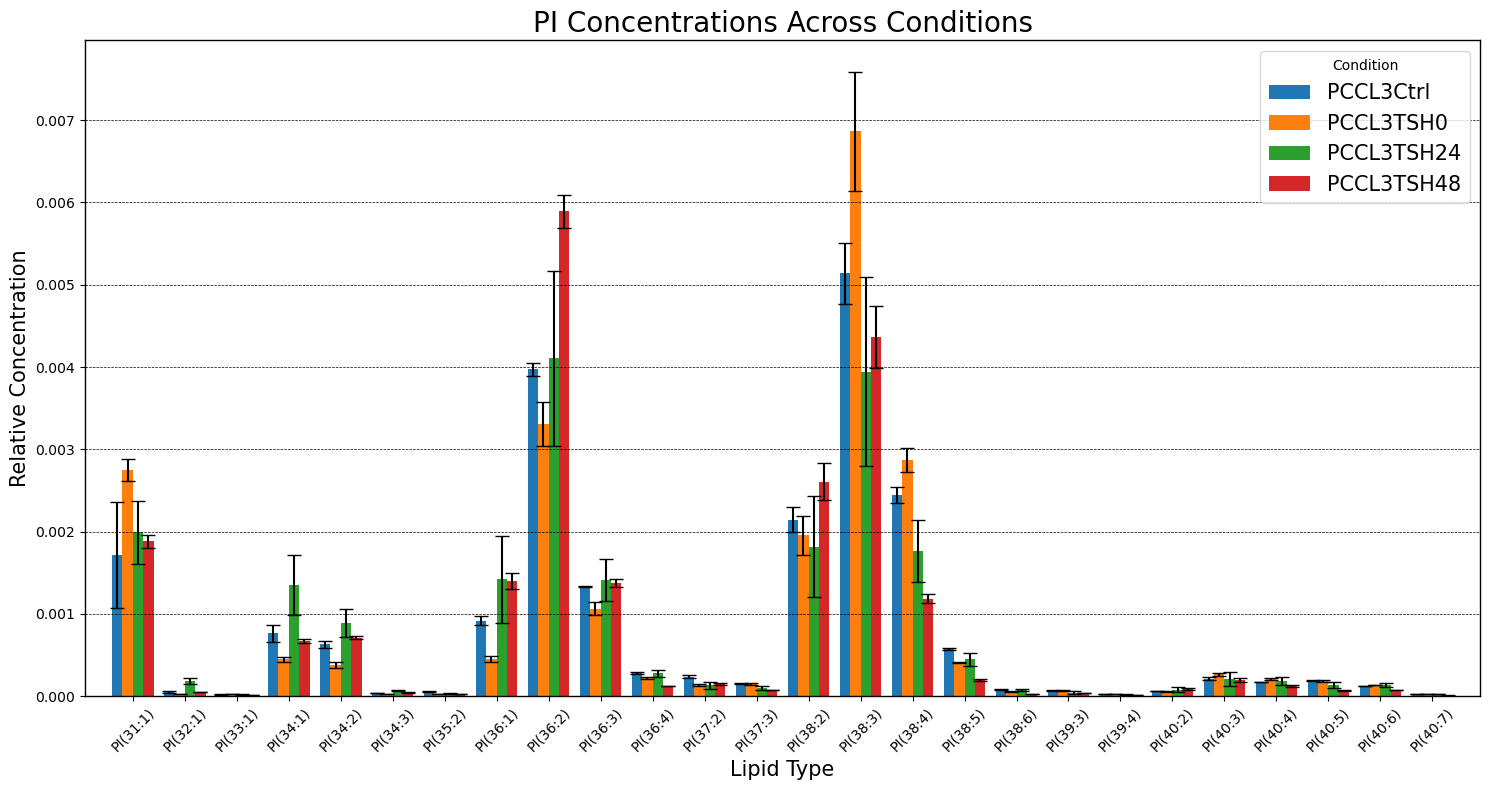

In [46]:
# Setting up the plot
fig, ax = plt.subplots(figsize=(15, 8))


# Determine the number of unique conditions to calculate offsets
conditions = df_pivot['condition'].unique()
width = 0.8 / len(conditions)  # width of each bar
x = np.arange(len(df_pivot['index'].unique()))  # the label locations

# Plotting each condition
for i, condition in enumerate(conditions):
    subset = df_pivot[df_pivot['condition'] == condition]
    ax.bar(x + i * width, subset['mean'], width, yerr=subset['std'], label=condition, capsize=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_facecolor('none')
ax.set_xlabel('Lipid Type', fontsize=15)
ax.set_ylabel('Relative Concentration', fontsize=15)
ax.set_title(f'{lipid} Concentrations Across Conditions', fontsize=20)
ax.set_xticks(x + width * (len(conditions) - 1) / 2)  # Adjust x-ticks to be in the middle of the groups
ax.set_xticklabels(df_pivot['index'].unique())
plt.xticks(rotation=45)  # Rotate lipid names for better visibility
ax.legend(title='Condition', fontsize=15)

# Add grid lines
ax.grid(True, color='black', linestyle='--', linewidth=0.5)

# Adjust margins
ax.margins(x=0.02)  # Reduces the x-margins, adjust the value as needed
ax.xaxis.grid(False)

# Setting a bold border for the plot
for spine in ax.spines.values():
    spine.set_linewidth(1)  # Set the width of the border
    spine.set_color('black')  # Set the color of the border

plt.tight_layout()
plt.savefig(f'../bar_plots/{lipid}_concentrations_across_conditions.svg', format='svg')
plt.show()

## Volcano Plot

In [49]:
# Creation of the volcano class to generate the plot.... this could be in a separate file

class Volcano(object):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib
    matplotlib.style.use('ggplot')
    
    def __init__(self, ratio, p_val, label=None, s_curve_x_axis_overplot=0.5, s_curve_y_axis_overplot=0.5):
        '''
        :param ratio: Pandas.Series or Numpy.Array or List of log2(fold change)
        :param p_val: Pandas.Series or Numpy.Array or List of -log10(p-values) 
        :param label: Pandas.Series or Numpy.Array or ListOfString
        '''
        assert len(ratio) == len(p_val)
        self.df = pd.DataFrame({"ratio": ratio, "p_val": p_val})
        if label is not None:
            self.df["label"] = label
        self.s_curve_y_axis_overplot = s_curve_y_axis_overplot
        self.p_val_cutoff = self.get_p_val_cutoff()
        self.ratio_cutoff = self.get_ratio_cutoff()
        self.df["s_val"] = self.df.apply(self.calc_s_from_row, axis=1)
        self.ratio_for_s = pd.Series(np.linspace(self.df["ratio"].min() - s_curve_x_axis_overplot, self.df["ratio"].max() + s_curve_x_axis_overplot, num=1000))
        self.p_for_s_larger_1 = self.ratio_for_s.apply(self.calc_p_for_s_equals_1)

    def get_p_val_cutoff(self):
        """
        p_val_cutoff = 0.05
        pc = 3.5 + median(p_val(50% lowest log2_ratios))
        -log10_pval of 2.0 --> pval of 0.01
        """
        ### hard coded cutoff of 1%
        # return math.log(0.01, 10) * -1
        quant = self.df["ratio"].quantile(0.5)
        return 2.0 + self.df.loc[self.df["ratio"] < quant, "p_val"].median()

    def get_ratio_cutoff(self):
        """
        log2_ratio_cutoff = 2.0 
        ratio_cutoff_high = 2 + median(ratio(50% lowest log10_p_values))
        ratio_cutoff_low = 0.5 - median(ratio(50% lowest log10_p_values))        
        """
        ### hard coded cutoff of 2 fold enrichment or depletion
        # return math.log(0.5, 2), math.log(2, 2)
        quant = self.df["p_val"].quantile(0.5)
        median_ = self.df.loc[self.df["p_val"] < quant, "ratio"].median()
        ratio_cutoff_high = 2.0 + median_
        ratio_cutoff_low = -2.0 - median_
        return ratio_cutoff_low, ratio_cutoff_high

    def calc_s_from_row(self, row):
        p_val = row["p_val"]
        ratio = row["ratio"]
        return self.calc_s(p_val, ratio)

    def calc_s(self, p_val, ratio):
        """
        so the algorithmn for finding stuff with s > 1 is:
        discard stuff below the ratio_cutoff
        discard stuff below the p-val cutoff
        do the calcuation for the stuff above BOTH cutoffs and accept all with s > 1
        s = (p_val - p_val_cutoff) * (ratio - ratio_cutoff)
        :param p_val: Float(-log10 p-value)
        :param ratio: Float(log2 ratio)
        :return: Float
        """
        ratio_delta = 0
        ratio_cutoff_low, ratio_cutoff_high = self.ratio_cutoff
        if ratio > 0:
            ratio_delta = ratio - ratio_cutoff_high
            if ratio_delta < 0:
                return 0
        elif ratio < 0:
            ratio_delta = ratio - ratio_cutoff_low
            if ratio_delta > 0:
                return 0
        ratio_delta = abs(ratio_delta)
        p_val_delta = p_val - self.p_val_cutoff
        if p_val_delta < 0:
            return 0
        return p_val_delta * ratio_delta

    def calc_p_for_s_equals_1(self, ratio):
        """
        :param ratio: Float(log2 ratio)
        :return: Float
        """
        ratio_cutoff_low, ratio_cutoff_high = self.ratio_cutoff
        ratio_delta_high = ratio - ratio_cutoff_high
        ratio_delta_low = ratio - ratio_cutoff_low

        if ratio > ratio_cutoff_high:
            return (1.0 / ratio_delta_high) + self.p_val_cutoff
        elif ratio < ratio_cutoff_low:
            return (1.0 / (ratio_delta_low * -1)) + self.p_val_cutoff
        else:
            return np.nan

    def get_fig(self, title="Volcano plot", s_value_cutoff=1.0, tags=None, labels_font=10, color_code=1):
        '''
        tags: list of strings with the lipids to be color coded and added to the legend
        labels_font: size of the labels on the dots of the scatter plot
        color_code: 0 --> no distintion between cutoffs 
                    1 --> red: downregulated, gray: no changes, blue: upregulated
        '''
        
        
        fig, ax1 = plt.subplots(figsize=(12, 12))
        ax1.set_title(title, fontsize=30)

        x = self.df["ratio"]
        y = self.df["p_val"]
        
        if color_code == 1:
            col=[]
            for i in range(0,len(x)):
                if x[i]>=1 and y[i]> 1.3:
                    col.append('b') 
                elif x[i]<=-1 and y[i]> 1.3:
                    col.append('r') 
                else:
                    col.append('gray') 

            for i in range(len(x)):
                ax1.scatter(x[i],y[i],c=col[i], s=80, alpha = 0.2)
        elif color_code == 0:
                ax1.scatter(x,y,c='gray', s=80, alpha = 0.2)
            
        ax1.axhline(y=1.3, color='gray', alpha = 0.5, linestyle = '--', linewidth=2)
        ax1.axvline(x= -1, color='gray', alpha = 0.5, linestyle = '--', linewidth=2)
        ax1.axvline(x= 1, color='gray', alpha = 0.5, linestyle = '--', linewidth=2)
        ax1.set_xlabel('$Log_{2}(fold-change)$', fontsize=20, color='black')
        ax1.set_ylabel('$-Log_{10}(pvalue)$', fontsize=20, color='black')
        ax1.grid(False)
        ax1.set_facecolor("white")
        ax1.patch.set_edgecolor('black')
        ax1.patch.set_linewidth('2') 
        ax1.set_ylim([0, 7])
        
        if tags == None:
            if "label" in self.df.columns:
                cond = (abs(self.df["ratio"]) >= 1)# and (self.df["p_val"] < 1.3)
                for index_, row in self.df[cond].iterrows():
                    label = row["label"]
                    x_coord = row["ratio"]
                    y_coord = row["p_val"]
                    ax1.annotate(label, xy = (x_coord, y_coord), xycoords='data', xytext = (5, 5),
                        textcoords = 'offset points', arrowprops = dict(arrowstyle = "-"), fontsize = labels_font)
        else:
            i=0
            col=['peachpuff','thistle','plum','lightblue','lightgreen','pink','turquoise','orange','darkseagreen','moccasin','salmon', 'skyblue', 'coral', 'black']
            for tag in tags:
                if "label" in self.df.columns:
                    self.df_2 = self.df[self.df['label'].str.contains(tag)]
                    cond = ((abs(self.df_2["ratio"]) >= 1) & (self.df_2["p_val"] >= 1.3))
                    x_coord = []
                    y_coord = []
                    for index_, row in self.df_2[cond].iterrows():
                        label = row["label"]
                        x_coord.append(row['ratio'])
                        y_coord.append(row['p_val'])
                        #ax1.annotate(label, xy = (x_coord, y_coord), xycoords='data', xytext = (5, 5),
                         #            textcoords = 'offset points', arrowprops = dict(arrowstyle = "-"), fontsize = labels_font)
                    ax1.scatter(x_coord, y_coord, c=col[i], s=100, alpha = 0.8, label=tag)
                    plt.legend()
                i+=1

        return fig

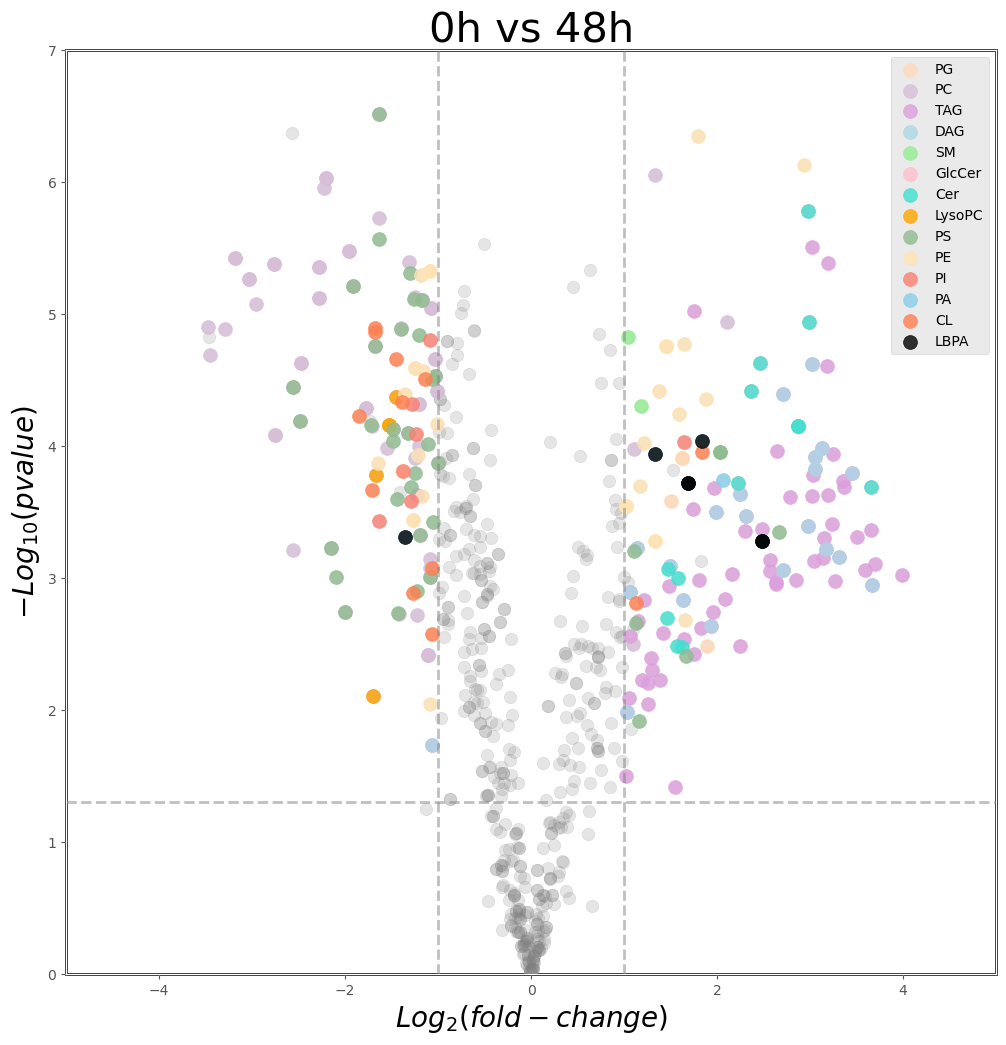

In [50]:
#create the Volcano object

df_pvalue2 = df_pvalue.reset_index()
#df_pvalue2 = df_pvalue2.replace(0, np.nan)
#df_pvalue2 = df_pvalue2.dropna(how='all', axis=0)

v = Volcano(df_pvalue2["log2_fold_change"], df_pvalue2["minuslog10_pvalue"], df_pvalue2["index"], 
            s_curve_x_axis_overplot=.05, 
            s_curve_y_axis_overplot=.5)
tag=['PG','PC','TAG','DAG','SM','GlcCer','Cer','LysoPC','PS','PE','PI','PA','CL','LBPA']
fig = v.get_fig(title='0h vs 48h',tags=tag, labels_font=6, color_code=0)
plt.xlim([-5, 5])
fig.savefig(f"../volcano/pccl3_tsh_volcano_{tag}.svg", format='svg', dpi=1200)

## Heatmap

In [51]:
# Calculate z-score for each condition
z_scores = df_pvalue[['PCCL3Ctrl_mean','PCCL3TSH0_mean','PCCL3TSH24_mean','PCCL3TSH48_mean']].apply(zscore, axis=1)

In [52]:
# Define your lipid category mapping
tag_mapping = {
    'PG': 'PG',
    'PC': 'PC',
    'TAG': 'TAG',
    'DAG': 'DAG',
    'SM': 'SM',
    'GlcCer': 'GlcCer',
    'CER': 'Cer',
    'LysoPC': 'LysoPC',
    'PS': 'PS',
    'PE': 'PE',
    'PI': 'PI',
    'PA': 'PA',
    'CL': 'CL',
    'LBPA': 'LBPA',
    'OthSL': 'OthSL'
}

In [53]:
z_scores['Category'] = z_scores.index.map(lambda x: next((k for k in tag_mapping if x.startswith(k)), None))
z_scores = z_scores.set_index(['Category'])

In [54]:
z_scores

,PCCL3Ctrl_mean,PCCL3TSH0_mean,PCCL3TSH24_mean,PCCL3TSH48_mean
Category,,,,
DAG,0.300076,-0.343870,-1.354829,1.398623
DAG,-1.103252,0.295844,-0.684725,1.492133
DAG,0.260336,0.478405,0.940302,-1.679043
DAG,1.075150,0.289258,0.274242,-1.638650
DAG,-1.186469,0.886185,1.088726,-0.788442
...,...,...,...,...
GlcCer,0.468972,-1.640299,0.136508,1.034819
GlcCer,-0.191705,-1.175118,-0.224400,1.591223
GlcCer,-0.103343,-1.262339,-0.172518,1.538200


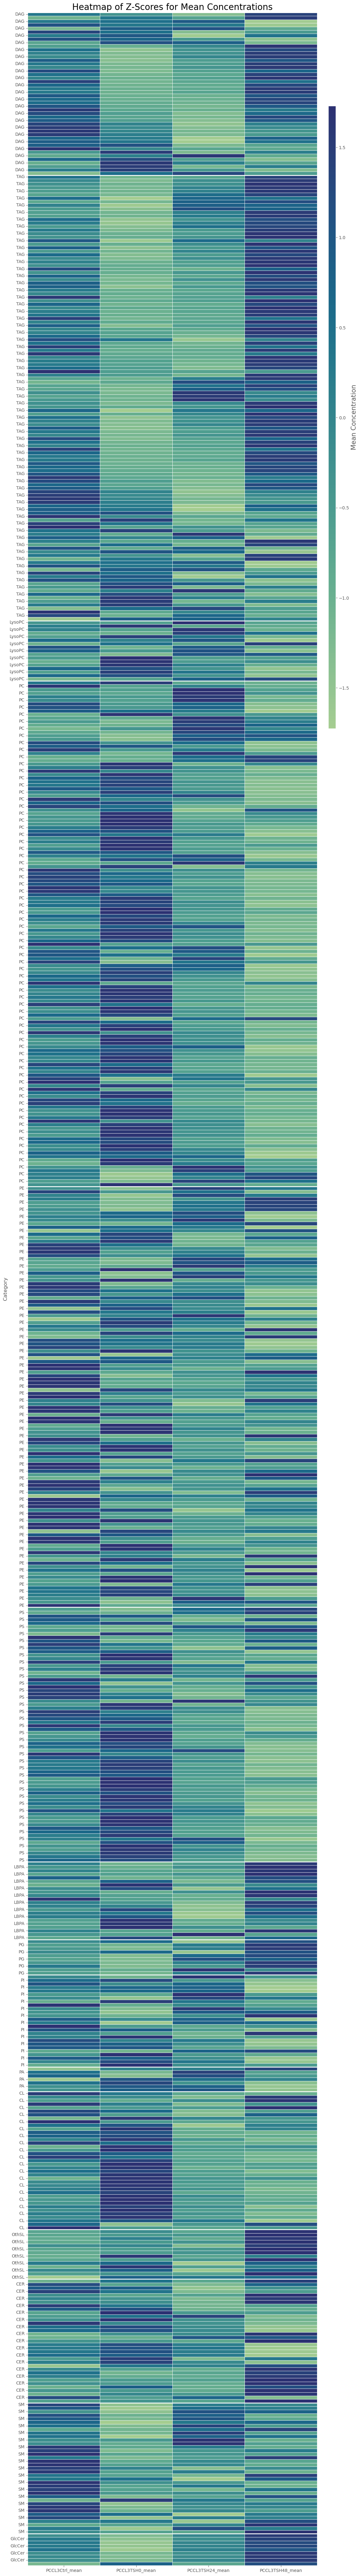

In [57]:
# Plotting z-score heatmap
fig, ax = plt.subplots(figsize=(12, 100))
sns.heatmap(z_scores, cmap='crest',linewidths=.5, cbar=False)

# Manually add color bar
cbar_ax = fig.add_axes([0.93, 0.7, 0.02, 0.2])  # [left, bottom, width, height]
cbar = fig.colorbar(ax.collections[0], cax=cbar_ax)
cbar.set_label('Mean Concentration', size=15)

# Adjust the position of the main plot to make room for the title and color bar
ax.set_title('Heatmap of Z-Scores for Mean Concentrations', fontsize=20)
fig.subplots_adjust(top=0.93, right=0.9)  # Leave space for the color bar

categories = z_scores.reset_index()['Category'].map(lambda x: next((k for k in tag_mapping if x.startswith(k)), None))
change = np.where(categories != categories.shift())[0]
for pos in change:
    ax.axhline(pos, color='white', lw=2)

fig.savefig("../heatmaps/heatmap_tsh.svg", format='svg')
plt.show()